### Capstone : Sentiment based product recommendation system 
#### Puneeth Shivashankara
### Problem Statement:
Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

*Data sourcing and sentiment analysis

*Building a recommendation system

*Improving the recommendations using the sentiment analysis model

*Deploying the end-to-end project with a user interface    

#### Importing the required libraries

In [1]:
!pip install spellchecker

     |████████████████████████████████| 3.9 MB 12.4 MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966514 sha256=92758668c2aaec3858a74800bb108aa49c90a39c922f3650dd427713068c20f2
  Stored in directory: /root/.cache/pip/wheels/58/e9/48/b82b733a7a0a9cc52ed239ccf082ff33e2fbda71670ddd3349
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7140 sha256=d214202fc3fb1e8053c33390fcd936581022cd12d76cee514817abb9f3928d2c
  Stored in directory: /root/.cache/pip/wheels/3c/f3/5d/77e8983e86af1c3c62b80d76de8020f560ce6367f1b2763b40
  Created wheel for silpa-common: filename=silpa_common-0.3-py3-none-any.whl size=8482 sha256=f78473bbc1734299a80d1b967fd1d0141af7638fe7d191859a1fc67080ce4cdc
  Stored in directory: /root/.cache/pip/wheels/02/81/11/40ef1cf40f5c4021a214653ca3362914f0f9e14e8322f75f9b
  Created wheel for soundex: filename=soundex-1.1.3-py3-none-any.whl size=8894 sha256=46deade6711f6e0df9481b503d1777cd1edf674406c5aac9342

In [2]:
import pandas as pd
import numpy as np
import string
import nltk
#pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', -1)
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
!pip3 install xgboost
import xgboost as xgb
from sklearn.metrics import confusion_matrix

!pip install pyspellchecker
from nltk import FreqDist
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle
from spellchecker import SpellChecker

from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 2.7 MB 12.4 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
#Reading the file
product = pd.read_csv("/content/gdrive/MyDrive/Capstone_SPBRS/sample30.csv")

In [7]:
#checking first 5 rows
product.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,NaN,NaN,walker557,Negative


In [8]:
#Checking last 5 rows
product.tail(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-23T00:00:00.000Z,False,True,5,"I got this conditioner with Influenster to try it and im loving it so far, i have oily hair so i use it only in the ends of my hair and feels amazing, so soft and no mess!! This review was collected as part of a promotion.",Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purposes from influenster and it leaves my hair feeling fresh and smelling great",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product. After you wash your hair it is so smooth and easy to brush! I did receive this product from influenster for testing purposes but all opinions ARE my own! This review was collected as part of a promotion.,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-11T00:00:00.000Z,False,True,5,"I received this through Influenster and will never go back to anything else! I normally don't use conditioner because my hair is so oily and fine. This does not make my hair feel heavy, and it doesn't get oily during the day! It really is fantastic and plan on buying it in the future! This review was collected as part of a promotion.",Perfect for my oily hair!,NaN,NaN,ktreed95,Positive
29999,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,2017-01-19T00:00:00.000Z,False,True,5,I received this product complimentary from influenster and it has really saved my hair. This product really gives the extra boost of health and strength to bring hair back to life. It hasn't helped my hair in so many ways. This review was collected as part of a promotion.,Conditioned into healthy,NaN,NaN,kcoopxoxo,Positive


In [9]:
product.shape

(30000, 15)

In [10]:
product.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [11]:
product.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating          int64 
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

In [12]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [13]:
product.describe()['reviews_rating']

count    30000.000000
mean     4.483133    
std      0.988441    
min      1.000000    
25%      4.000000    
50%      5.000000    
75%      5.000000    
max      5.000000    
Name: reviews_rating, dtype: float64

In [14]:
#Find the minimum and maximum rating given
print('Minimum rating is: %d' %(product.reviews_rating.min()))
print('Maximum rating is: %d' %(product.reviews_rating.max()))

Minimum rating is: 1
Maximum rating is: 5


The rating for the products varies from 1 to 5

#### Adding the review text and review title into a new column 'review'

In [15]:
product["review"]= product['reviews_title'].map(str) + ' ' + product['reviews_text'].map(str)

#### Dropping columns reviews date ,reviews_doRecommended,reviews_didPurchase,review_usercity,review_usernanme

In [16]:
drop_list=['reviews_text','reviews_title','manufacturer','reviews_date','reviews_didPurchase','reviews_doRecommend',
          'reviews_userProvince','reviews_userCity']
product=product.drop(drop_list,axis=1)

In [17]:
product.head()

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor. This review was collected as part of a promotion.
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,"Disappointed I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,Irritation My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


In [18]:
product.shape

(30000, 8)

In [19]:
Punctuation="!#$%&\()*+,-./:;<=>?@[\\]^_`{|}~"
def removePunctuation(text):
    import string
    translator = text.translate(str.maketrans("","", string.punctuation))
    return translator

def lowercase(text):
     return text.lower()

cachedStopWords = stopwords.words("english")

def remove_stopword(text):    
    tokens = word_tokenize(text)
    tokens_without_sw = [word for word in tokens if word not in cachedStopWords]    
    return  " ".join(tokens_without_sw)

def remove_singleChar(text):
    tokens = word_tokenize(text)
    res = ' '.join([word  for word in tokens if len(word)>2])
    return res

def remove_num(text):  
    tokens = word_tokenize(text)
    res = ' '.join([word  for word in tokens if not word.isdigit()])
    return res

### Data Cleaning

In [20]:
product['review']=product['review'].apply(lowercase)

In [21]:
product['review']=product['review'].apply(removePunctuation)

In [22]:
product['review']=product['review'].apply(remove_stopword)

In [23]:
product['review']=product['review'].apply(remove_singleChar)

In [24]:
product['review']=product['review'].apply(remove_num)

In [25]:
product.head()

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,Positive,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,1,rebecca,Negative,disappointed read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting disappointed paid much lube wont use could use normal personal lubricant less money less mess
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,1,walker557,Negative,irritation husband bought gel gel caused irritation felt like burning skin wouldnt recommend gel


spell = SpellChecker()

def spellCheck(text):
    correct_word = [spell.correction(word) for word in text.split()]
    return  " ".join(correct_word)

In [26]:
#product['review']=product['review'].apply(spellCheck)

In [27]:
#from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
def SnowballStemmer(text):
    tokens = word_tokenize(text.lower())    
    snowball_stemmed = [stemmer.stem(token) for token in tokens]
    return  " ".join(snowball_stemmed)

In [28]:
#product['review']=product['review'].apply(SnowballStemmer)

In [29]:
product.to_csv("product_final.csv",index=False)

In [30]:
product_2 = pd.read_csv("product_final.csv").dropna()

In [31]:
product_2.head(1)

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy


In [32]:
def plot_word_frequency(words, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(labels, counts)
    return plot


def review_as_statement(text):
     return str(text)


In [33]:
document=""
document=document+ " ".join(map(str,product_2['review'].apply(review_as_statement)))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


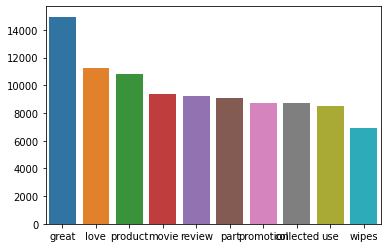

In [34]:
words = nltk.tokenize.word_tokenize(document)
plot_word_frequency(words, 10)

### Model Building

### Model: Logistic Regression

In [35]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(product_2.review)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_model,product_2.user_sentiment,test_size=.7, random_state=0)

In [37]:
logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)

In [38]:
logit.fit(X_train, y_train)

LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predict_test = logit.predict(X_test)

In [40]:
y_test_pred=pd.DataFrame(predict_test, columns=['Predicted'])
y_test_actual=pd.DataFrame(y_test).reset_index(drop=True)
y_test_pred['Actual']=y_test_actual.user_sentiment
y_test_pred.head()

,Predicted,Actual
0,Positive,Positive
1,Positive,Positive
2,Negative,Negative
3,Positive,Positive
4,Positive,Positive


In [41]:
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)
y_pred_copy=vfunc(predict_test)
y_test_copy=y_test.apply(lambda x:0 if x=='Negative' else 1) 
    
    
accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
precision = round(precision_score(y_test_copy,y_pred_copy), 3)
recall = round(recall_score(y_test_copy,y_pred_copy), 3)
f1     =round(f1_score(y_test_copy, y_pred_copy),3)
print(' A: {} / P: {} / R: {} / F1 : {}'.format(
                                    accuracy,
                                    precision,
                                    recall,
                                      f1))

 A: 0.904 / P: 0.934 / R: 0.96 / F1 : 0.947


In [42]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1092,1262,2354
1,749,17852,18601
All,1841,19114,20955


### Minority class correct pred:45%
### Class Imbalance Handling

In [43]:
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
X_train.shape,y_train.shape,X_train_sm.shape,y_train_sm.shape

((8980, 21581), (8980,), (15954, 21581), (15954,))

### Fitting the model after class balancing

In [45]:
logit.fit(X_train_sm, y_train_sm)

LogisticRegression(C=50.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=4, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predict_test = logit.predict(X_test)

In [47]:
y_test_pred=pd.DataFrame(predict_test, columns=['Predicted'])
y_test_actual=pd.DataFrame(y_test).reset_index(drop=True)
y_test_pred['Actual']=y_test_actual.user_sentiment
y_test_pred.head()

,Predicted,Actual
0,Positive,Positive
1,Positive,Positive
2,Negative,Negative
3,Positive,Positive
4,Positive,Positive


In [48]:
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)
y_pred_copy=vfunc(predict_test)
y_test_copy=y_test.apply(lambda x:0 if x=='Negative' else 1) 
    
    
accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
precision = round(precision_score(y_test_copy,y_pred_copy), 3)
recall = round(recall_score(y_test_copy,y_pred_copy), 3)
f1     =round(f1_score(y_test_copy, y_pred_copy),3)
print(' A: {} / P: {} / R: {} / F1 : {}'.format(
                                    accuracy,
                                    precision,
                                    recall,
                                      f1))

 A: 0.888 / P: 0.946 / R: 0.927 / F1 : 0.936


In [49]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1368,986,2354
1,1361,17240,18601
All,2729,18226,20955


The percentage of minority class correctly predicted is very low with both imbalanced(40 percent) and balanced data set(55 percent).

#### Predicting the LR on the entire data set.

In [50]:
predict_test = logit.predict(tfidf_model )

In [51]:
y_test_pred=pd.DataFrame(predict_test, columns=['Predicted'])
y_test_actual=pd.DataFrame(product_2.user_sentiment).reset_index(drop=True)
y_test_pred['Actual']=y_test_actual.user_sentiment
y_test_pred.head()

,Predicted,Actual
0,Positive,Positive
1,Positive,Positive
2,Positive,Positive
3,Negative,Negative
4,Negative,Negative


In [52]:
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)
y_pred_copy=vfunc(predict_test)
y_test_copy=product_2.user_sentiment.apply(lambda x:0 if x=='Negative' else 1) 
    
    
accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
precision = round(precision_score(y_test_copy,y_pred_copy), 3)
recall = round(recall_score(y_test_copy,y_pred_copy), 3)
f1     =round(f1_score(y_test_copy, y_pred_copy),3)
print(' A: {} / P: {} / R: {} / F1 : {}'.format(
                                    accuracy,
                                    precision,
                                    recall,
                                      f1))

 A: 0.921 / P: 0.962 / R: 0.948 / F1 : 0.955


In [53]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2370,987,3357
1,1386,25192,26578
All,3756,26179,29935


#### On Applying the Logistic regression after balancing the data set, on the entire table, gives a  accuracy of 92 percent.

### Model: Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
classifier = RandomForestClassifier(n_estimators=100,)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
rf = RandomForestClassifier()
scores = cross_val_score(rf,X_train,y_train.values.ravel(),cv=5)
print(scores)
scores.mean()

[0.8981069  0.89755011 0.89699332 0.90200445 0.89420935]


0.8977728285077952

In [56]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [57]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(X_train,y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.888 (+/-0.001) for {'max_depth': 2, 'n_estimators': 5}
0.888 (+/-0.001) for {'max_depth': 2, 'n_estimators': 50}
0.888 (+/-0.001) for {'max_depth': 2, 'n_estimators': 100}
0.889 (+/-0.002) for {'max_depth': 10, 'n_estimators': 5}
0.888 (+/-0.001) for {'max_depth': 10, 'n_estimators': 50}
0.888 (+/-0.001) for {'max_depth': 10, 'n_estimators': 100}
0.889 (+/-0.001) for {'max_depth': 20, 'n_estimators': 5}
0.889 (+/-0.001) for {'max_depth': 20, 'n_estimators': 50}
0.888 (+/-0.001) for {'max_depth': 20, 'n_estimators': 100}
0.891 (+/-0.009) for {'max_depth': None, 'n_estimators': 5}
0.897 (+/-0.004) for {'max_depth': None, 'n_estimators': 50}
0.897 (+/-0.003) for {'max_depth': None, 'n_estimators': 100}


In [58]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf1.fit(X_train, y_train.values.ravel())
rf2 = RandomForestClassifier(n_estimators=50,max_depth=None)
rf2.fit(X_train, y_train.values.ravel())
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)

In [60]:
for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_test)
    y_pred_copy=vfunc(y_pred)
    y_test_copy=y_test.apply(lambda x:0 if x=='Negative' else 1)    
    accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
    precision = round(precision_score(y_test_copy,y_pred_copy), 3)
    recall = round(recall_score(y_test_copy,y_pred_copy), 3)
    f1     =round(f1_score(y_test_copy, y_pred_copy),3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {} / f1: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall,
                                                                         f1))

MAX DEPTH: None / # OF EST: 100 -- A: 0.896 / P: 0.896 / R: 0.998 / f1: 0.944
MAX DEPTH: None / # OF EST: 50 -- A: 0.895 / P: 0.897 / R: 0.997 / f1: 0.944
MAX DEPTH: None / # OF EST: 5 -- A: 0.891 / P: 0.9 / R: 0.986 / f1: 0.941


In [61]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,326,2028,2354
1,264,18337,18601
All,590,20365,20955


The pass percentage of minority class is 324/2354 is 14 percent.

Fitting the model after balancng the dataset

In [62]:
rf1 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf1.fit(X_train_sm, y_train_sm)
rf2 = RandomForestClassifier(n_estimators=50,max_depth=None)
rf2.fit(X_train_sm, y_train_sm)
rf3 = RandomForestClassifier(n_estimators=5,max_depth=None)
rf3.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)

In [64]:
for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_test)
    y_pred_copy=vfunc(y_pred)
    y_test_copy=y_test.apply(lambda x:0 if x=='Negative' else 1)    
    accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
    precision = round(precision_score(y_test_copy,y_pred_copy), 3)
    recall = round(recall_score(y_test_copy,y_pred_copy), 3)
    f1     =round(f1_score(y_test_copy, y_pred_copy),3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {} / f1: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall,
                                                                         f1))

MAX DEPTH: None / # OF EST: 100 -- A: 0.889 / P: 0.911 / R: 0.97 / f1: 0.939
MAX DEPTH: None / # OF EST: 50 -- A: 0.884 / P: 0.912 / R: 0.962 / f1: 0.936
MAX DEPTH: None / # OF EST: 5 -- A: 0.847 / P: 0.913 / R: 0.914 / f1: 0.914


In [65]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,741,1613,2354
1,1600,17001,18601
All,2341,18614,20955


#### The pass percentage of minority class is 658/2354 is 28 percent

### Model:XGBOOST

In [66]:
BOW_XGB = xgb.XGBClassifier(
        n_estimators=10, 
        objective='binary:logistic',
        n_jobs=-1
    )

In [67]:
BOW_XGB.fit(X_train.toarray(), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
result = BOW_XGB.predict(X_test.toarray())

In [ ]:
y_test_pred=pd.DataFrame(result, columns=['Predicted'])
y_test_actual=pd.DataFrame(y_test).reset_index(drop=True)
y_test_pred['Actual']=y_test_actual.user_sentiment
y_test_pred.head()

In [ ]:
print(metrics.accuracy_score(y_test_pred.Actual, y_test_pred.Predicted))

In [ ]:
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)
y_pred_copy=vfunc(result)
y_test_copy=y_test.apply(lambda x:0 if x=='Negative' else 1)
accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
precision = round(precision_score(y_test_copy,y_pred_copy), 3)
recall = round(recall_score(y_test_copy,y_pred_copy), 3)
f1     =round(f1_score(y_test_copy, y_pred_copy),3)
print(' A: {} / P: {} / R: {} / F1 : {}'.format(
                                    accuracy,
                                    precision,
                                    recall,
                                      f1)) 

In [ ]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,125,2229,2354
1,48,18553,18601
All,173,20782,20955


In [ ]:
BOW_XGB = xgb.XGBClassifier(
        n_estimators=100, # use large n_estimators deliberately to make use of the early stopping
        objective='binary:logistic',
        n_jobs=-1
    )

In [ ]:
BOW_XGB.fit(X_train.toarray(), y_train)

C:\Users\jayas\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:47:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
result = BOW_XGB.predict(X_test.toarray())

In [ ]:
y_test_pred=pd.DataFrame(result, columns=['Predicted'])
y_test_actual=pd.DataFrame(y_test).reset_index(drop=True)
y_test_pred['Actual']=y_test_actual.user_sentiment
y_test_pred.head()

,Predicted,Actual
0,Positive,Positive
1,Positive,Positive
2,Positive,Negative
3,Positive,Positive
4,Positive,Positive


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)
y_pred_copy=vfunc(result)
y_test_copy=y_test.apply(lambda x:0 if x=='Negative' else 1)
accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
precision = round(precision_score(y_test_copy,y_pred_copy), 3)
recall = round(recall_score(y_test_copy,y_pred_copy), 3)
f1     =round(f1_score(y_test_copy, y_pred_copy),3)
print(' A: {} / P: {} / R: {} / F1 : {}'.format(
                                    accuracy,
                                    precision,
                                    recall,
                                      f1)) 
    
    


 A: 0.908 / P: 0.917 / R: 0.986 / F1 : 0.95


In [ ]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,687,1667,2354
1,267,18334,18601
All,954,20001,20955


The best model is LR WITH BALANCED DATA SET.



In [ ]:
### Predicting the entire dataset with LR model and storing the predicted value in a new column 'user_sentiment_pred'.

In [ ]:
predict_test = logit.predict(tfidf_model )

In [ ]:
y_test_pred=pd.DataFrame(predict_test, columns=['Predicted'])
y_test_actual=pd.DataFrame(product_2.user_sentiment).reset_index(drop=True)
y_test_pred['Actual']=y_test_actual.user_sentiment
y_test_pred.head()

,Predicted,Actual
0,Positive,Positive
1,Positive,Positive
2,Positive,Positive
3,Negative,Negative
4,Negative,Negative


In [ ]:
squarer = lambda t: 1 if t=='Positive' else 0
vfunc = np.vectorize(squarer)
y_pred_copy=vfunc(predict_test)
y_test_copy=product_2.user_sentiment.apply(lambda x:0 if x=='Negative' else 1) 
    
    
accuracy = round(accuracy_score(y_test_copy,y_pred_copy), 3)
precision = round(precision_score(y_test_copy,y_pred_copy), 3)
recall = round(recall_score(y_test_copy,y_pred_copy), 3)
f1     =round(f1_score(y_test_copy, y_pred_copy),3)
print(' A: {} / P: {} / R: {} / F1 : {}'.format(
                                    accuracy,
                                    precision,
                                    recall,
                                      f1))

 A: 0.921 / P: 0.962 / R: 0.949 / F1 : 0.955


In [ ]:
confusion_matrix(y_test_copy,y_pred_copy)
pd.crosstab(y_test_copy, y_pred_copy, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2364,993,3357
1,1363,25215,26578
All,3727,26208,29935


In [ ]:
product_2['user_sentiment_pred']=y_test_pred['Predicted']

In [ ]:
product_2.to_csv("prod_with_pred.csv",index=False)

Reading the prod_with_pred dataset and working on the data to build Recommendation system.

In [ ]:
ratings=pd.read_csv("prod_with_pred.csv")
ratings.head(1)

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy,Positive


In [ ]:
ratings = ratings.dropna()

In [ ]:
ratings['id_2']=ratings['id']
ratings['reviews_username_2']=ratings['reviews_username']
ratings.head(1)

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy,Positive,AV13O1A8GV-KLJ3akUyj,joshua


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
ratings[["id","reviews_username"]] = enc.fit_transform(ratings[["id","reviews_username"]])

def int_conv(x):
    return int(x)


ratings['id']=ratings['id'].apply(int_conv)
ratings['reviews_username']=ratings['reviews_username'].apply(int_conv)
ratings['reviews_rating']=ratings['reviews_rating'].apply(int_conv)
ratings=ratings.drop_duplicates(subset=['id', 'reviews_rating','reviews_username'],
                                       keep='first')


In [ ]:
ratings.head(1)

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
0,0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,11417,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy,Positive,AV13O1A8GV-KLJ3akUyj,joshua


In [ ]:
ratings.nunique()

id                     271  
brand                  214  
categories             270  
name                   271  
reviews_rating         5    
reviews_username       24851
user_sentiment         2    
review                 26819
user_sentiment_pred    2    
id_2                   271  
reviews_username_2     24851
dtype: int64

## Saving the ratings data set after pre processing the data set needed for recommendation system.

In [ ]:
ratings.to_csv("ratings.csv",index=False)

### Saving ratings file to be used for sentiment analysis of the 20 recommended movies.


In [ ]:
# Test and Train split of the dataset.
train, test = train_test_split(ratings, test_size=0.30, random_state=31)

In [ ]:
train.nunique()

id                     250  
brand                  202  
categories             249  
name                   250  
reviews_rating         5    
reviews_username       17814
user_sentiment         2    
review                 18949
user_sentiment_pred    2    
id_2                   250  
reviews_username_2     17814
dtype: int64

In [ ]:
train.head(2)

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
21986,248,Yes to Grapefruit,"Personal Care,Bath, Shower & Soap,Body Wash & Cleanser,Bath & Body,Body Wash & Cleansers,Beauty,Bath & Body Care,Scrubs & Body Treatments,Body Scrubs",Yes To Grapefruit Rejuvenating Body Wash,4,9146,Positive,love soap hate packaging like summary says love soap hate packaging soap rinses well without drying leaving heavy scent unlike reviews definite grapefruit smell bottle real complaint product like others said bottle either soap viscous top somehow faulty simply release soap first couple squeezes try get top kind exploded topless bottle sitting shower right asking trouble find better receptacle put maybe reusable pumps tried use one already bottle neck smaller pump issue shampooconditioner use bottles,Positive,AVpfnRuSilAPnD_xfB8l,hauti
27715,196,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5,8430,Positive,great gift kiddos got fiancs nephew happy get loves cars planes pixar movies happy christmas morning,Positive,AVpfRTh1ilAPnD_xYic2,germz7


In [ ]:
# Pivot the train ratings' dataset into matrix format in which columns are movies and the rows are user IDs.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)



# Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [ ]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [ ]:
dummy_train.head()

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
21986,248,Yes to Grapefruit,"Personal Care,Bath, Shower & Soap,Body Wash & Cleanser,Bath & Body,Body Wash & Cleansers,Beauty,Bath & Body Care,Scrubs & Body Treatments,Body Scrubs",Yes To Grapefruit Rejuvenating Body Wash,4,9146,Positive,love soap hate packaging like summary says love soap hate packaging soap rinses well without drying leaving heavy scent unlike reviews definite grapefruit smell bottle real complaint product like others said bottle either soap viscous top somehow faulty simply release soap first couple squeezes try get top kind exploded topless bottle sitting shower right asking trouble find better receptacle put maybe reusable pumps tried use one already bottle neck smaller pump issue shampooconditioner use bottles,Positive,AVpfnRuSilAPnD_xfB8l,hauti
27715,196,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5,8430,Positive,great gift kiddos got fiancs nephew happy get loves cars planes pixar movies happy christmas morning,Positive,AVpfRTh1ilAPnD_xYic2,germz7
24206,187,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,4,11752,Negative,godzilla need say godzilla come long way since days black white,Positive,AVpfPaoqLJeJML435Xk9,jvknows
5199,85,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainment,Movie & Tv Box Sets,Movies,Horror,Movies & TV Shows,All Horror,Movies & Tv On Blu-Ray,Movies & TV,Blu-ray,Action & Adventure,Movies & Music,Holiday Shop",The Resident Evil Collection 5 Discs (blu-Ray),5,20841,Positive,excellent collection awesome collection resident evil movies definitely best group movies,Positive,AVpf0eb2LJeJML43EVSt,shaycollins1
13567,93,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,10021,Positive,good stuff amazing use wash clean various things around house love product safe kids clothes animal bedding review collected part promotion,Positive,AVpf3VOfilAPnD_xjpun,jai45


In [ ]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [ ]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [ ]:
dummy_train.head()

id,0,1,2,3,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,...,228,229,230,231,232,233,234,235,236,237,238,239,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,266,267,268,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# **Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.



# User Similarity Matrix
# Using Cosine Similarity

In [ ]:
df_pivot.index.nunique()

17814

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
user_correlation.shape

(17814, 17814)

# Using adjusted Cosine 

Here, we are not removing the NaN values and calculating the mean only for the movies rated by the user

In [ ]:
# Create a user-movie matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

Normalising the rating of the movie for each user around 0 mean

In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [ ]:
df_subtracted.head()

id,0,1,2,3,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,...,228,229,230,231,232,233,234,235,236,237,238,239,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,266,267,268,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ##Finding cosine similarity

In [ ]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
user_correlation.shape

(17814, 17814)

## Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [ ]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset). 

In [ ]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
user_predicted_ratings.shape

(17814, 250)

In [ ]:
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

In [ ]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,0,1,2,3,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,...,228,229,230,231,232,233,234,235,236,237,238,239,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,266,267,268,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_final_rating.head()

id,0,1,2,3,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,...,228,229,230,231,232,233,234,235,236,237,238,239,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,266,267,268,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Saving the Model

In [ ]:
file_name = "Recommendation.pkl"
pickle.dump(user_final_rating, open(file_name, "wb"))

# Finding the top 20 recommendation for the *user*

In [ ]:
# Take the user ID as input.
user_input = int(input("Enter your user name"))
print(user_input)

Enter your user name2
2


In [ ]:
user_final_rating.head()

id,0,1,2,3,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,...,228,229,230,231,232,233,234,235,236,237,238,239,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,266,267,268,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

id
270    0.0
85     0.0
99     0.0
98     0.0
97     0.0
96     0.0
95     0.0
94     0.0
93     0.0
92     0.0
91     0.0
89     0.0
88     0.0
87     0.0
86     0.0
84     0.0
69     0.0
83     0.0
82     0.0
81     0.0
Name: 2, dtype: float64

In [ ]:
#Mapping with product name
pdt_mapping = ratings
pdt_mapping.head()

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
0,0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,11417,Positive,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy,Positive,AV13O1A8GV-KLJ3akUyj,joshua
1,1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg Organic Cinnamon Toast Rice Cakes,5,6962,Positive,good good flavor review collected part promotion,Positive,AV14LG0R-jtxr-f38QfS,dorothy w
3,2,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,1,19274,Negative,disappointed read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lacked captivating sensation expecting disappointed paid much lube wont use could use normal personal lubricant less money less mess,Negative,AV16khLE-jtxr-f38VFn,rebecca
4,2,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,1,24142,Negative,irritation husband bought gel gel caused irritation felt like burning skin wouldnt recommend gel,Negative,AV16khLE-jtxr-f38VFn,walker557
5,2,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y Love Sensuality Pleasure Gel,1,20149,Negative,worth boyfriend bought spice things bedroom highly disappointed product bought one absolutely love mine thought would similar affect absolutely nothing buy,Positive,AV16khLE-jtxr-f38VFn,samantha


In [ ]:
d = pd.merge(d,pdt_mapping,left_on='id',right_on='id', how = 'left')
d.head()

,id,2,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
0,270,0.0,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Beauty,Salon Hair Care,Styling Products,Conditioners",L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,1,10964,Negative,nan hate stuff wasted money buying made hair feel like weighed tons tacky feeling washed hair wash three times could get product hair,Negative,AVpfvieo1cnluZ0-qdnu,jingle
1,270,0.0,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Beauty,Salon Hair Care,Styling Products,Conditioners",L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,1,4749,Negative,nan product wash ive washed hair times still wont come almost like wax gum stuck hair recommend anyone ive used sorts spiking puttys waxes glues etc ive never issue,Positive,AVpfvieo1cnluZ0-qdnu,chris33
2,270,0.0,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Beauty,Salon Hair Care,Styling Products,Conditioners",L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,1,15087,Negative,nan stuff wash hair even washes,Negative,AVpfvieo1cnluZ0-qdnu,mathias
3,270,0.0,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Beauty,Salon Hair Care,Styling Products,Conditioners",L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,1,2192,Positive,nan product ridiculous indeed holds sculpts firmly matte finish good luck getting hair days later multiple washes poor hair left feeling tacky clumpy stiff like straw another review stated stuck chewing gum would totally accurate comparison first styling purchase loreal expected much leading name hair care disappointing never,Positive,AVpfvieo1cnluZ0-qdnu,bend
4,270,0.0,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Beauty,Salon Hair Care,Styling Products,Conditioners",L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,1,10079,Negative,nan like reviewers impressed quality hold product thick hair fine texture incredibly difficult style rarely drugstore product hold hair day however like reviewers incredibly disappointed fact product wash know would need different shampoo remove product would purchased nothing label indicating clarifying shampoo necessary,Positive,AVpfvieo1cnluZ0-qdnu,jamesr


In [ ]:
train_new = pd.merge(train,pdt_mapping,left_on='id',right_on='id',how='left')

### Evaluation - User User

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [ ]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1115, 11)

In [ ]:
common.head()

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
4490,30,Happy Family,"Food,Packaged Foods,Toddler Food,Baby,Feeding,Baby Food",Happy Tot Apple and Butternut Squash,5,16451,Positive,even like love butternut squash wanted try pouch gave kidsand tasty also used muffins made sons preschool halloween party used zucchini carrots banana pouch make healthy fruitveggie cupcake kids gobbled without even realizing chia seed many healthy nutrients like omega fiber reviewers said basically really recommend pouch flavor every parent,Positive,AVpe-PJnLJeJML43ziaj,momof3
19124,163,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",Clorox Disinfecting Bathroom Cleaner,5,5418,Positive,great high chair love use clean kids toys disinfect high chair quick easy,Positive,AVpfJP1C1cnluZ0-e3Xy,coribecca
2715,42,Universal Home Video,"Movies, Music & Books,Movies,Comedy,Movies & TV Shows,Instawatch Movies By VUDU,Shop Instawatch,Movies & TV,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & Music,Instawatch,Blu-ray",My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),4,15301,Positive,nice twist expecting one thing got another love characters still available movie,Positive,AVpe59io1cnluZ0-ZgDU,mecawecakte
28207,196,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,Blu-Rays,See ALL Blu-Ray,Frys",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),5,15424,Positive,great family movie great movie whole family enjoyed,Negative,AVpfRTh1ilAPnD_xYic2,melanie
12963,93,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,16273,Positive,love great product fresh clean scent overpowering,Positive,AVpf3VOfilAPnD_xjpun,mom23inmi


In [ ]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [ ]:
common_user_based_matrix.head()

id,2,3,5,7,8,9,10,12,15,16,17,19,21,24,30,32,33,37,40,41,42,45,48,50,53,54,55,58,60,61,66,67,68,69,70,71,73,74,75,76,...,186,187,190,191,192,193,194,195,196,199,205,206,209,210,213,215,217,218,219,221,222,227,229,231,234,240,243,244,248,251,252,253,255,258,259,265,266,267,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [ ]:
user_correlation_df['reviews_username'] = df_subtracted.index

user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,17774,17775,17776,17777,17778,17779,17780,17781,17782,17783,17784,17785,17786,17787,17788,17789,17790,17791,17792,17793,17794,17795,17796,17797,17798,17799,17800,17801,17802,17803,17804,17805,17806,17807,17808,17809,17810,17811,17812,17813
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [ ]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [ ]:
user_correlation_df_3 = user_correlation_df_2.T

In [ ]:
user_correlation_df_3.head()

,15,196,302,307,339,382,412,459,542,553,560,586,624,642,665,674,682,745,760,774,782,854,880,906,964,971,977,1049,1058,1072,1076,1092,1102,1111,1146,1152,1179,1208,1227,1352,...,23386,23394,23428,23430,23598,23614,23628,23659,23683,23761,23771,23794,23827,23871,23881,23969,23996,24004,24009,24024,24053,24069,24070,24149,24175,24231,24242,24334,24374,24377,24395,24408,24420,24471,24473,24482,24668,24738,24748,24808
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [ ]:
dummy_test.shape

(901, 128)

In [ ]:
common_user_based_matrix.head()

id,2,3,5,7,8,9,10,12,15,16,17,19,21,24,30,32,33,37,40,41,42,45,48,50,53,54,55,58,60,61,66,67,68,69,70,71,73,74,75,76,...,186,187,190,191,192,193,194,195,196,199,205,206,209,210,213,215,217,218,219,221,222,227,229,231,234,240,243,244,248,251,252,253,255,258,259,265,266,267,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [ ]:
common_user_predicted_ratings.head()

id,2,3,5,7,8,9,10,12,15,16,17,19,21,24,30,32,33,37,40,41,42,45,48,50,53,54,55,58,60,61,66,67,68,69,70,71,73,74,75,76,...,186,187,190,191,192,193,194,195,196,199,205,206,209,210,213,215,217,218,219,221,222,227,229,231,234,240,243,244,248,251,252,253,255,258,259,265,266,267,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5633721538498584


# Using Item similarity

### Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product. 

In [ ]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,0,2,4,5,6,7,9,10,11,14,15,16,17,19,20,22,26,27,28,29,31,33,34,35,36,38,39,40,41,42,45,46,48,50,51,52,53,54,55,57,...,24795,24797,24798,24799,24800,24801,24802,24805,24806,24807,24808,24809,24811,24812,24813,24815,24816,24818,24819,24820,24821,24822,24823,24824,24825,24826,24827,24828,24829,24832,24833,24837,24838,24841,24842,24845,24846,24847,24848,24849
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the product rating for each product for using the Adujsted Cosine

In [ ]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

Finding the cosine similarity using pairwise distances approach

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [ ]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [ ]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00292376],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0073094 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
item_predicted_ratings.shape

(17814, 250)

### Filtering the rating only for the movies not rated by the user for recommendation

In [ ]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,0,1,2,3,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,40,41,42,43,44,45,...,228,229,230,231,232,233,234,235,236,237,238,239,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,266,267,268,269,270
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.036804,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.004755,0.0,0.0,0.000000,0.0,0.000000,0.0,0.001134,0.0,0.0,0.0,0.002122,0.0,0.0,0.0,0.0,0.0,0.001242,0.0,0.001589,0.0,0.0,0.0,0.0,0.0,0.000000,0.000590,0.0,0.0,0.0,0.018310,0.010885,0.0,0.008925,0.0,0.009919,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001288,0.0,0.0,0.0,0.001196,0.004088,0.0,0.000000,0.0,0.0,0.0,0.0,0.07764,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.006340,0.0,0.0,0.000000,0.0,0.000000,0.0,0.001513,0.0,0.0,0.0,0.002829,0.0,0.0,0.0,0.0,0.0,0.001656,0.0,0.002119,0.0,0.0,0.0,0.0,0.0,0.000000,0.000787,0.0,0.0,0.0,0.024413,0.014513,0.0,0.011900,0.0,0.013225,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001717,0.0,0.0,0.0,0.001595,0.005450,0.0,0.000000,0.0,0.0,0.0,0.0,0.10352,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.002394,0.0,0.002044,0.0,0.000000,0.0,0.0,0.0,0.002400,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001743,0.0,0.0,0.0,0.0,0.0,0.013787,0.009477,0.0,0.0,0.0,0.000799,0.000000,0.0,0.000000,0.0,0.005357,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011257,0.0,0.0,0.0,0.0,0.0,0.0,0.008831,0.012328,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003325,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.001402,0.0,0.0,0.007309
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.002394,0.0,0.002044,0.0,0.000000,0.0,0.0,0.0,0.002400,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001743,0.0,0.0,0.0,0.0,0.0,0.013787,0.009477,0.0,0.0,0.0,0.000799,0.000000,0.0,0.000000,0.0,0.005357,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011257,0.0,0.0,0.0,0.0,0.0,0.0,0.008831,0.012328,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003325,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.001402,0.0,0.0,0.007309


### Finding the top 20 recommendation for the *user*



In [ ]:
# Take the user ID as input
user_input = int(input("Enter your user name"))
print(user_input)

Enter your user name6
6


In [ ]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

id
163    1.135480
32     0.013787
244    0.012328
203    0.011792
235    0.011257
33     0.009477
196    0.009180
243    0.008831
105    0.008194
91     0.007802
270    0.007309
70     0.006688
210    0.005676
44     0.005357
68     0.005295
107    0.005034
53     0.004456
64     0.003672
255    0.003325
152    0.002850
Name: 9, dtype: float64

In [ ]:
#Mapping with product Title / Genres 
prod_mapping = ratings

In [ ]:
d = pd.merge(d,prod_mapping,left_on='id',right_on='id',how = 'left')
d.head()

In [ ]:
train_new = pd.merge(train,movie_mapping,left_on='id',right_on='id',how='left')
train_new[train_new.id == 1] .head()

NameError: ignored

# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [ ]:
common =  test[test.id.isin(train.id)]
common.shape

(8281, 11)

In [ ]:
common.head(4)

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
18955,163,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",Clorox Disinfecting Bathroom Cleaner,5,19944,Positive,works great use everything great easy clean bathroom,Positive,AVpfJP1C1cnluZ0-e3Xy,rubilynne4
6602,93,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,4,5505,Positive,clorox wipes clorox wipes easy use use home work disinfect desk review collected part promotion,Positive,AVpf3VOfilAPnD_xjpun,couponmcq
22188,180,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Instawatch Movies,Movies, Music & Books,Movies,Action & Adventure,Movies & TV,Shop Instawatch,Movies & Music",Alex Cross (dvdvideo),4,8190,Positive,comes alex cross read james pattersons books thought would absolutely love movie didnt enough background information alex cross makes character interesting tyler perrys acting excellent,Positive,AVpfOIrkilAPnD_xXgDG,funny67
28869,210,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday Shop,Christmas,Featured Brands,Health & Beauty,L'oreal,Personal Care,Hair Treatments,Conditioner",L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,3,18590,Positive,great drugstore conditioner received products freecomplimentary testing purposes opinions took hour challenge unfortunately see beneficial change hair end challenge looked like greaseball get great amount product expensive think product great somebody less oily roots remainder product friend dry hair smell great feels good hair review collected part promotion,Positive,AVpfW8y_LJeJML437ySW,pinksocietylife


In [ ]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [ ]:
common_item_based_matrix.shape

(197, 7920)

In [ ]:
item_correlation_df = pd.DataFrame(item_correlation)

In [ ]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df['id'] = df_subtracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list_name = common.id.tolist()

In [ ]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [ ]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [ ]:
item_correlation_df_3.head()

,2,3,5,6,7,8,9,11,12,15,...,257,258,259,260,261,262,266,267,269,270
id,,,,,,,,,,,,,,,,,,,,,
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003658,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00986348, 0.00792543, 0.00348248, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0045063 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00112178],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01174439, ..., 0.        , 0.        ,
        0.00584752]])

In [ ]:
common_item_predicted_ratings.shape

(197, 7920)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train



In [ ]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.


In [ ]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\jayas\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\jayas\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [ ]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [ ]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5862526480783186


# The RMSE of user based recommendation is lower than item based recommendation .Hence the user based recommendation engine is better.

### The Rating file contains the predicted sentiment based on LOGISTIC REGRESSION .The recommendation.pkl file contains the model for recommendation based on user id.The recommended system recommend 20 movies id, and based on that top 5 are selected from ratings data frame on the basis of sentiment.

In [ ]:
import pickle
import pandas as pd

In [ ]:

file_name = "Recommendation.pkl"
Recommendation_loaded = pickle.load(open(file_name, "rb"))

ratings=pd.read_csv('ratings.csv')

In [ ]:
ratings.head(1)

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
0,0,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,11417,Positive,awesome love album good hip hop side current p...,Positive,AV13O1A8GV-KLJ3akUyj,joshua


In [ ]:
# Take the user ID as input
user_input = int(input("Enter your user name"))
print(user_input)

Enter your user name6
6


In [ ]:
# Recommending the Top 20 products to the user.
d = Recommendation_loaded.loc[user_input].sort_values(ascending=False)[0:20]
d

id
270    0.0
85     0.0
99     0.0
98     0.0
97     0.0
96     0.0
95     0.0
94     0.0
93     0.0
92     0.0
91     0.0
89     0.0
88     0.0
87     0.0
86     0.0
84     0.0
69     0.0
83     0.0
82     0.0
81     0.0
Name: 6, dtype: float64

In [ ]:
list = d.to_frame().reset_index().id.to_list()
print(list)
#Using the id , filtering all the movies with same id.
ratings_top=ratings[ratings['id'].apply(lambda x:x in list)]
ratings_top.head(1)

[270, 85, 99, 98, 97, 96, 95, 94, 93, 92, 91, 89, 88, 87, 86, 84, 69, 83, 82, 81]


,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,review,user_sentiment_pred,id_2,reviews_username_2
3997,69,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...","Newman's Own Organics Licorice Twist, Black 5oz",2,11896,Negative,nan soft leave get bit stale could eat,Positive,AVpe8q4T1cnluZ0-afct,karen


In [ ]:
ratings_top.user_sentiment_pred=ratings_top.user_sentiment_pred.apply(lambda x:0 if x=='Negative' else 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### The count method , calculated the sentiment in terms of percentage , and then top 5 movies id are selected based on sentiment

In [ ]:
list_perc=[]
def count(df):
  for x in list:
    list2=[x]
    dummy_frame=ratings_top[ratings_top.id.apply(lambda x:x  in list2)]
    deno=len(dummy_frame)
    num=dummy_frame.user_sentiment_pred.sum()
    list_perc.append(round(num/deno,3))



In [ ]:
count(ratings_top)
list_perc

[0.913,
 0.78,
 0.755,
 0.761,
 0.727,
 0.925,
 1.0,
 0.75,
 0.889,
 0.795,
 0.946,
 0.75,
 0.875,
 1.0,
 0.714,
 0.794,
 0.833,
 0.833,
 1.0,
 0.846]

In [ ]:
temp=d.to_frame()
temp['Sentiment_percent']=list_perc

In [ ]:
top5_list = temp.Sentiment_percent.sort_values(ascending=False)[0:5].to_frame().reset_index().id.to_list()
top5_list

[95, 82, 87, 91, 96]

## PRINTING THE 5 RECOMMENDED PRODUCTS BASED ON SENTIMENT

In [ ]:

product_recommended=set(ratings_top[ratings_top['id'].apply(lambda x:x in top5_list)].name.tolist())
product_recommended

{'Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter',
 "Chips Deluxe Soft 'n Chewy Cookies",
 'If A Man Answers (dvd)',
 "Nearly Natural 5.5' Bamboo W/decorative Planter",
 'Red (special Edition) (dvdvideo)'}